In [19]:
import numpy as np
from scipy.ndimage import gaussian_filter
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import matplotlib as mpl
from scipy.integrate import odeint
from numpy import linalg as LA
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
mpl.rcdefaults() 
from scipy.stats import uniform
import scipy.stats as st
from matplotlib import colors
from matplotlib import cm
import pandas as pd
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy
import json
import xarray as xr
import pickle
from scipy.stats import linregress
from EWS_functions import *
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

jtplot.style(context='paper', fscale=1.4, spines=True, grid=False, ticks=True,gridlines='--')

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
hfont = {'fontname':'Arial'}

mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

In [3]:
def runlam(x, w):
    n = x.shape[0]
    xs = np.zeros_like(x)
    xs[: w//2] = np.nan
    xs[n-w//2:] = np.nan

    for i in range(w // 2, n - w // 2):
        xw = x[i - w // 2 : i + w // 2 + 1]
        xw = xw - xw.mean()
        lg = st.linregress(np.arange(xw.shape[0]), xw)[:]
        p0 = lg[0]
        p1 = lg[1]
        xw = xw - p0 * np.arange(xw.shape[0]) - p1

        dxw = xw[1:] - xw[:-1]
         # a, b = np.polyfit(xw[:-1], dxw, 1)
        lg = st.linregress(xw[:-1], dxw)[:]
        a = lg[0]
        b = lg[1]

        xs[i] = np.log(a + 1)
    return xs

In [8]:
# def runlam_cor(x, w):
#   n = x.shape[0]
#   xs = np.zeros_like(x)
#   xs[: w//2] = np.nan
#   xs[n-w//2:] = np.nan
#   for i in range(w // 2, n - w // 2):
#      xw = x[i - w // 2 : i + w // 2 + 1]
#      xw = xw - xw.mean()

#      # p0, p1 = np.polyfit(np.arange(xw.shape[0]), xw, 1)
#      lg = st.linregress(np.arange(xw.shape[0]), xw)[:]
#      p0 = lg[0]
#      p1 = lg[1]

#      xw = xw - p0 * np.arange(xw.shape[0]) - p1

#      dxw = xw[1:] - xw[:-1]

#      xw = sm.add_constant(xw)
#      model = sm.GLSAR(dxw, xw[:-1], rho=1)
#      results = model.iterative_fit(maxiter=10)
#      # results = model.iterative_fit()

#      a = results.params[1]

#      xs[i] = np.log(a + 1)
#   return xs

In [6]:
ntime = 165
niter = 133
fakess = np.zeros((3,niter,ntime))
for i ,a in enumerate([0.5,0.7,0.9]):
    ar1 = np.array([1, -a])
    ma1 = np.array([1])
    AR_object1 = ArmaProcess(ar1, ma1)

    fakess[i,:] = AR_object1.generate_sample(nsample=[niter,ntime],axis=1)

In [16]:
data = fakess[0]
time = np.arange(ntime)

In [17]:
ws = 70
trends_lam1 = np.zeros(niter)
for i in range(niter):
    ts = data[i]
    sts = gaussian_filter(ts, 10)
    ts = ts - sts

    lam1 = runlam(ts, ws)

    trends_lam1[i] = st.kendalltau(time[ws // 2 : -ws // 2], lam1[ws // 2 : -ws // 2])[0]


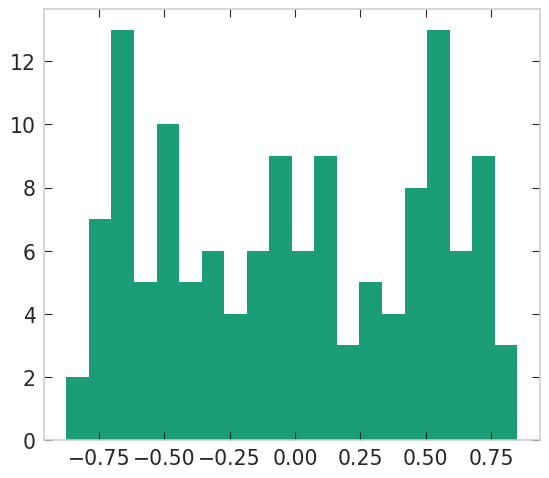

In [22]:
plt.hist(trends_lam1,bins=20)
plt.show()

In [23]:
ws = 30
trends_lam1_w30 = np.zeros(niter)
for i in range(niter):
    ts = data[i]
    sts = gaussian_filter(ts, 10)
    ts = ts - sts

    lam1 = runlam(ts, ws)

    trends_lam1_w30[i] = st.kendalltau(time[ws // 2 : -ws // 2], lam1[ws // 2 : -ws // 2])[0]


/tmp/ipykernel_28616/3977239817.py:21: RuntimeWarning: invalid value encountered in log
  xs[i] = np.log(a + 1)


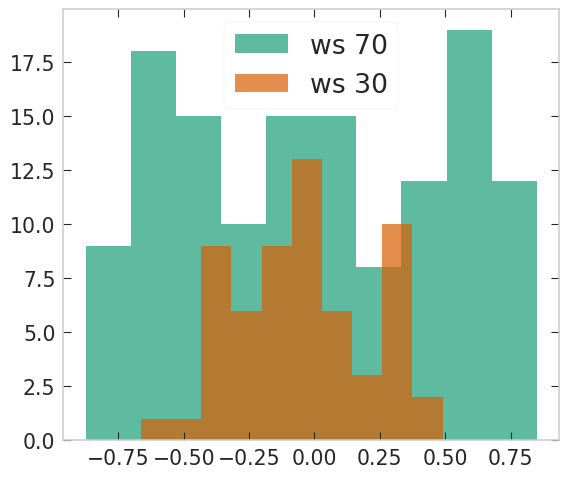

In [25]:
plt.hist(trends_lam1,bins=10,alpha=0.7,label='ws 70')
plt.hist(trends_lam1_w30,bins=10,alpha=0.7,label='ws 30')
plt.legend()
plt.show()

# more iterations

In [26]:
ntime = 165
niter = 1000
fakess2 = np.zeros((3,niter,ntime))
for i ,a in enumerate([0.5,0.7,0.9]):
    ar1 = np.array([1, -a])
    ma1 = np.array([1])
    AR_object1 = ArmaProcess(ar1, ma1)

    fakess2[i,:] = AR_object1.generate_sample(nsample=[niter,ntime],axis=1)

In [27]:
data2 = fakess2[0]
time = np.arange(ntime)

In [28]:
ws = 70
trends_lam1 = np.zeros(niter)
for i in range(niter):
    ts = data2[i]
    sts = gaussian_filter(ts, 10)
    ts = ts - sts

    lam1 = runlam(ts, ws)

    trends_lam1[i] = st.kendalltau(time[ws // 2 : -ws // 2], lam1[ws // 2 : -ws // 2])[0]


/tmp/ipykernel_28616/3977239817.py:21: RuntimeWarning: invalid value encountered in log
  xs[i] = np.log(a + 1)


In [33]:
ws = 30
trends_lam1_w30 = np.zeros(niter)
for i in range(niter):
    ts = data2[i]
    sts = gaussian_filter(ts, 10)
    ts = ts - sts

    lam1 = runlam(ts, ws)

    trends_lam1_w30[i] = st.kendalltau(time[ws // 2 : -ws // 2], lam1[ws // 2 : -ws // 2])[0]


/tmp/ipykernel_28616/3977239817.py:21: RuntimeWarning: invalid value encountered in log
  xs[i] = np.log(a + 1)


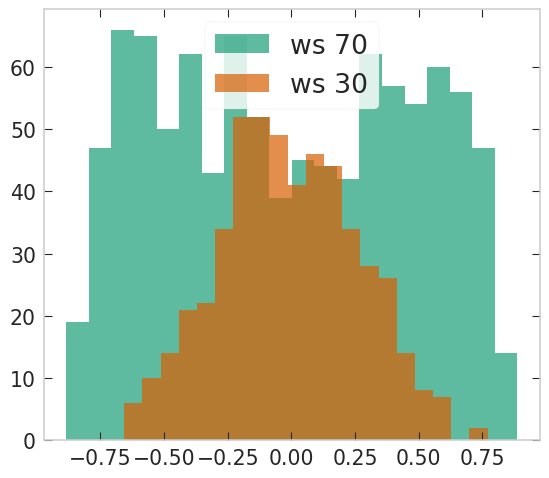

In [35]:
plt.hist(trends_lam1,bins=20,alpha=0.7,label='ws 70')
plt.hist(trends_lam1_w30,bins=20,alpha=0.7,label='ws 30')
plt.legend()
plt.show()

# 170 years

In [36]:
ntime = 170
niter = 1000
fakess3 = np.zeros((3,niter,ntime))
for i ,a in enumerate([0.5,0.7,0.9]):
    ar1 = np.array([1, -a])
    ma1 = np.array([1])
    AR_object1 = ArmaProcess(ar1, ma1)

    fakess3[i,:] = AR_object1.generate_sample(nsample=[niter,ntime],axis=1)

In [37]:
data3 = fakess3[0]
time3 = np.arange(170)

In [38]:
ws = 70
trends_lam1 = np.zeros(niter)
for i in range(niter):
    ts = data2[i]
    sts = gaussian_filter(ts, 10)
    ts = ts - sts

    lam1 = runlam(ts, ws)

    trends_lam1[i] = st.kendalltau(time[ws // 2 : -ws // 2], lam1[ws // 2 : -ws // 2])[0]


/tmp/ipykernel_28616/3977239817.py:21: RuntimeWarning: invalid value encountered in log
  xs[i] = np.log(a + 1)


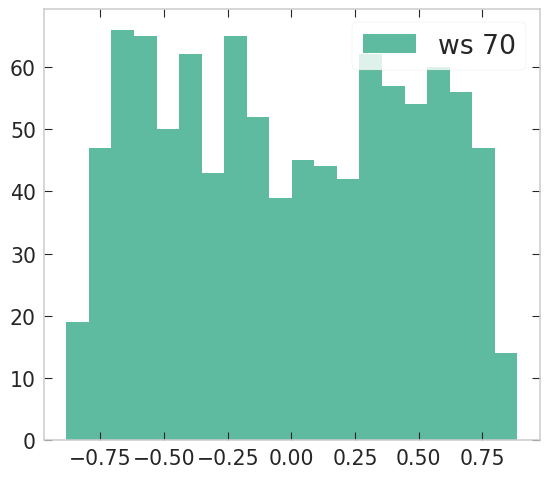

In [39]:
plt.hist(trends_lam1,bins=20,alpha=0.7,label='ws 70')
# plt.hist(trends_lam1_w30,bins=20,alpha=0.7,label='ws 30')
plt.legend()
plt.show()